### Import data 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import string
import matplotlib.pyplot as plt 
import nltk , os

from os import path
from wordcloud import WordCloud
from nltk.corpus import stopwords
from string import digits

In [2]:
# Load data as a dataframe
sms_raw = pd.read_csv('sms_spam.csv')

# see the first 5 rows
sms_raw.head(5)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data cleaning
1. Convert text into string
2. Remove digits
3. Remove punctuation
4. Extract unique words
5. Extract words happen more than 20 times


In [3]:
# Convert text into string
sms_string_0 = sms_raw['text']
spam_string_0 = sms_raw[sms_raw['type'] == 'spam']['text']
ham_string_0 = sms_raw[sms_raw['type'] == 'ham']['text']

sms_string = ''.join(sms_string_0)
spam_string = ''.join(spam_string_0)
ham_string = ''.join(ham_string_0)

In [4]:
# Remove digits & punctuation
remove_digits = str.maketrans('','', digits)
remove_punctuation = str.maketrans('', '', string.punctuation)


sms_string_res = sms_string.translate(remove_digits)
sms_string_res = sms_string_res.translate(remove_punctuation)

spam_string_res = spam_string.translate(remove_digits)
spam_string_res = spam_string_res.translate(remove_punctuation)

ham_string_res = ham_string.translate(remove_digits)
ham_string_res = ham_string_res.translate(remove_punctuation)

In [48]:

# Remove stop words
from nltk.corpus import stopwords
from collections import Counter
sms_filtered_words = [word for word in sms_string_res.split() if word.lower not in stopwords.words('english')]

# Find the unique words
unique_words = set(sms_filtered_words)
count_unique = pd.DataFrame(unique_words).count()
count_unique

0    14293
dtype: int64

In [49]:
# Words happen more then 20 times
freq_word = []

for words in unique_words:
    if sms_filtered_words.count(words) >= 20:
        freq_word.append(words)

freq_word = np.array(freq_word)
freq_word.shape

(540,)

##### We have got 540 words that happen more than 20 times and 14293 unique words

In [15]:
# Use function 
def text_processor(text):
    text = text.translate(remove_digits)
    text = text.translate(remove_punctuation)
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return ' '.join(text)

sms_filtered_words_0 = sms_string_0.apply(text_processor)

In [16]:
sms_filtered_words_1 = ''.join(sms_filtered_words_0)
sms_filtered_words_0

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry wkly comp win FA Cup final tkts st ...
3                     U dun say early hor U c already say
4             Nah dont think goes usf lives around though
                              ...                        
5569    nd time tried contact u U £ Pound prize claim ...
5570                          ü b going esplanade fr home
5571                          Pity mood Soany suggestions
5572    guy bitching acted like id interested buying s...
5573                                       Rofl true name
Name: text, Length: 5574, dtype: object

### Visualisation
1. WordCloud for Spam
2. WordCloud for Ham
3. WorldCloud for frequent words

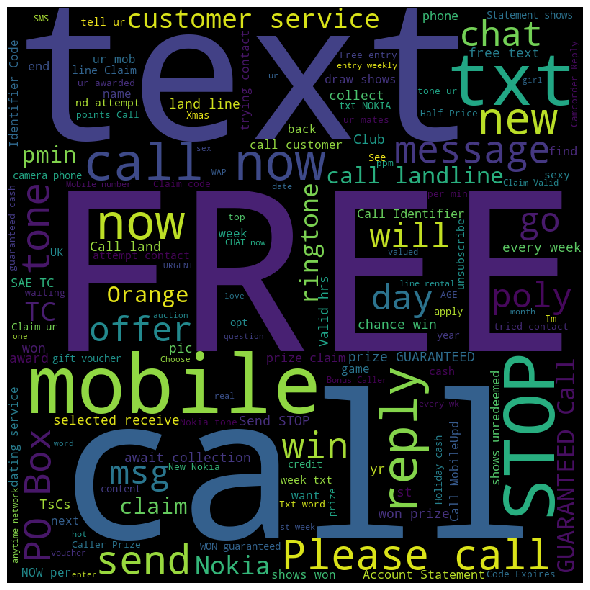

In [17]:
# Wordcloud for spam

wordcloud_spam = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(spam_string_res)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_spam) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

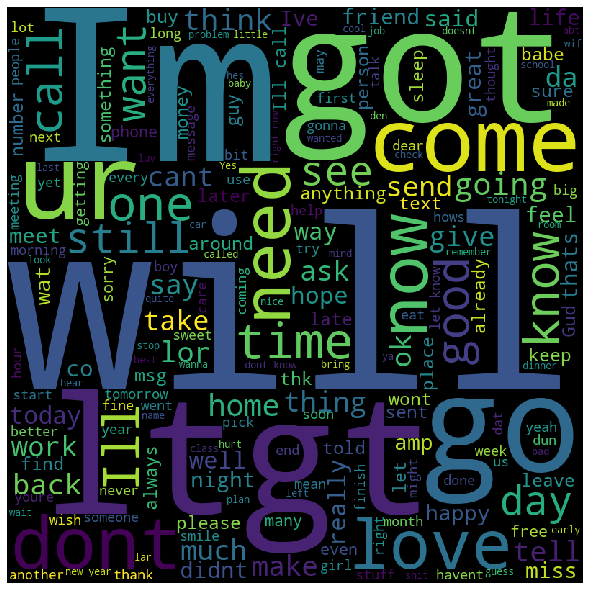

In [22]:
# Wordcloud for frequent words
wordcloud_ham = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(ham_string_res)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_ham) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(sms_filtered_words_0)
features

<5574x8497 sparse matrix of type '<class 'numpy.int64'>'
	with 45680 stored elements in Compressed Sparse Row format>

### Models

In [53]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, sms_raw['type'], test_size=0.3, random_state=111)

#### Logistic regression

In [65]:
from sklearn.linear_model import LogisticRegression
model_0 = LogisticRegression()
model_0.fit(features_train, labels_train)

# Prediction
pred_value = dict()
pred_value['Logistic'] = model_0.predict(features_test)

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(labels_test,pred_value['Logistic'])

0.9802749551703527

In [66]:
print(classification_report(labels_test,pred_value["Logistic"]))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1456
        spam       0.99      0.85      0.92       217

    accuracy                           0.98      1673
   macro avg       0.99      0.93      0.95      1673
weighted avg       0.98      0.98      0.98      1673



Accuracy of predicting spam class is 99% and ham class is 98%

#### Random Forests